In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
#Changing the directoy
os.chdir("C:\manideep\edwisor\Project - 2")

In [4]:
#Loading the csv
bike_rent =  pd.read_csv("Day.csv",index_col = 0)

In [5]:
bike_rent

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


## Missing Value Analysis

In [6]:
#Calculating the null values in the dataframe
missing_val = pd.DataFrame(bike_rent.isnull().sum())
missing_val = (missing_val/len(bike_rent))*100
missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percent'})


#No missing values found

## Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x25ac6773470>,
 'caps': [<matplotlib.lines.Line2D at 0x25ac6773b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ac6764fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ac6773f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ac6784518>],
 'means': []}

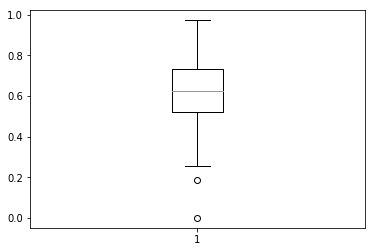

In [7]:
%matplotlib inline
plt.boxplot(bike_rent['hum'])

#outlier found in hum

{'whiskers': [<matplotlib.lines.Line2D at 0x25ac67f7ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ac6801860>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ac67f7da0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ac6801ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ac6801fd0>],
 'means': []}

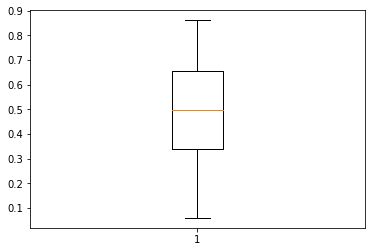

In [8]:
%matplotlib inline
plt.boxplot(bike_rent['temp'])

#No outliers found in temp

{'whiskers': [<matplotlib.lines.Line2D at 0x25ac6863cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ac67fe390>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ac68638d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ac67fea20>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ac67fed68>],
 'means': []}

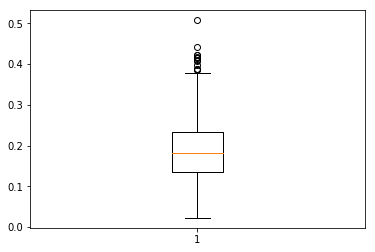

In [9]:
%matplotlib inline
plt.boxplot(bike_rent['windspeed'])

#outliers found in windspeed

In [10]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
cnames1 = ["hum","windspeed"]

In [11]:
#Detect & Delete Outliers
for i in cnames1 :
    print (i)
    q75,q25 = np.percentile(bike_rent.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_rent = bike_rent.drop(bike_rent[bike_rent.loc[:,i] < min].index)
    bike_rent = bike_rent.drop(bike_rent[bike_rent.loc[:,i] > max].index)   

hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


## Feature Engineering

In [12]:
#Converting variables to the appropriate data format 
bike_rent['season'] = bike_rent['season'].astype('category')
bike_rent['yr'] = bike_rent['yr'].astype('category')
bike_rent['mnth'] = bike_rent['mnth'].astype('category')
bike_rent['holiday'] = bike_rent['holiday'].astype('category')
bike_rent['weekday'] = bike_rent['weekday'].astype('category')
bike_rent['workingday'] = bike_rent['workingday'].astype('category')
bike_rent['weathersit'] = bike_rent['weathersit'].astype('category')
bike_rent['temp'] = bike_rent['temp'].astype('float')
bike_rent['atemp'] = bike_rent['atemp'].astype('float')
bike_rent['hum'] = bike_rent['hum'].astype('float')
bike_rent['windspeed'] = bike_rent['windspeed'].astype('float')
bike_rent['casual'] = bike_rent['casual'].astype('int')
bike_rent['registered'] = bike_rent['registered'].astype('int')
bike_rent['cnt'] = bike_rent['cnt'].astype('int')

## Feature Selection

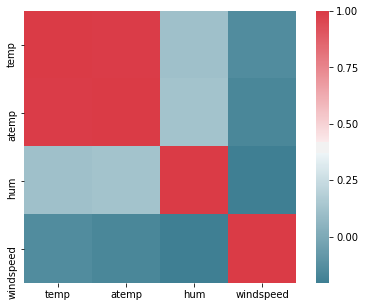

In [13]:
#Feature selection(Correlation, multicollinearity)
#Correlation Plot
corr = bike_rent.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr1 = corr.corr()

#Plot using seaborn library
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



In [14]:
#Chi Square Test of Independence
categories = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [15]:

for i in categories:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_rent['cnt'], bike_rent[i]))
    print(dof)

season
2049
yr
683
mnth
7513
holiday
683
weekday
4098
workingday
683
weathersit
1366


In [16]:
#Dropping atemp as it is highly correlated with temp,
#Dropping weekday,holiday because they dont contribute to the cnt variable
#Dropping Causal and registered as they are the not required.

bike_rent = bike_rent.drop(['atemp','holiday','workingday','casual','registered'], axis =1)

## Exploratory Data Analysis

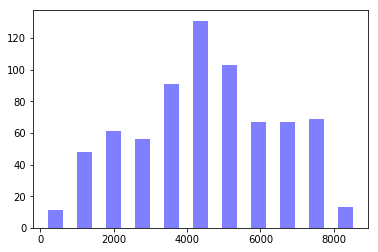

In [17]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(bike_rent['cnt'], num_bins, rwidth = 0.5, facecolor='blue', alpha=0.5)
plt.show()

Text(0, 0.5, 'Total count of bikes rented')

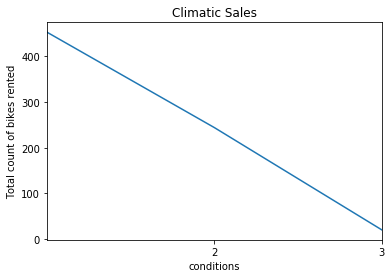

In [18]:
#Bike Rentals based on Weathersituations
sales_by_climate = bike_rent.groupby('weathersit').size()
plot_by_climate = sales_by_climate.plot(title='Climatic Sales',xticks=(range(1,3)))
plot_by_climate.set_xlabel('conditions')
plot_by_climate.set_ylabel('Total count of bikes rented')

Text(0, 0.5, 'Total count of bikes rented')

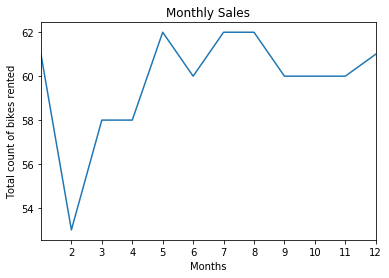

In [19]:
#Bike Rentals Monthly
sales_by_month = bike_rent.groupby('mnth').size()
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(range(1,12)))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total count of bikes rented')

Text(0, 0.5, 'Total count of bikes rented')

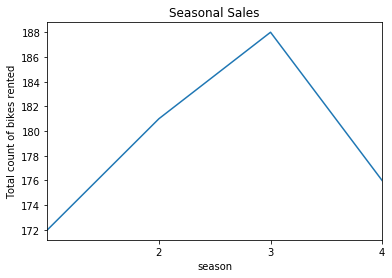

In [20]:
#Sales by Season
sales_by_season = bike_rent.groupby('season').size()
plot_by_season = sales_by_season.plot(title='Seasonal Sales',xticks=(range(1,4)))
plot_by_season.set_xlabel('season')
plot_by_season.set_ylabel('Total count of bikes rented')



## Model Development

In [21]:
#split library
from sklearn.model_selection import train_test_split

In [22]:
#Divide data into train and test

X = bike_rent.values[:,1:9]
Y = bike_rent.values[:,9]

X_train,Y_train,X_test,Y_test = train_test_split( X, Y, test_size = 0.2)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train the model on training data
RF_model = RandomForestRegressor(n_estimators = 1000).fit(X_train, X_test)

#Prediction on test data
rf_predictions = RF_model.predict(Y_train)

In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs(rf_predictions - Y_test) / Y_test)
final_mape = np.mean(mape)
print('MAPE:', round(final_mape, 2), '%')

MAPE: 12.42 %


### KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor

#Training the model on train data
KNN_model = KNeighborsRegressor(n_neighbors = 5).fit(X_train, X_test)

#Predicting on test data
KNN_Predictions = KNN_model.predict(Y_train)



In [134]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs(KNN_Predictions - Y_test) / Y_test)
final_mape = np.mean(mape)
print('MAPE:', round(final_mape, 2), '%')

Accuracy: 76.08 %


### Random forest is found to be efficient with low MAPE

In [29]:
final = pd.DataFrame(Y_train[:,0:11])
final['final_predictions'] = rf_predictions

final.to_csv("Random_forest_output.csv",index=False)